<a href="https://colab.research.google.com/github/Ankabellam/ChatDev/blob/main/Miniproject_Question(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data set given for the project is from "https://archive beta.ics.uci.edu/ml/datasets/productivity+prediction+of+garment+employees"  and is cited as Productivity Prediction of Garment Employees. (2020). UCI Machine Learning Repository. . The data file is attached as csv file. The following are details being provided . The data contains details on actual productivty of a garment industry, the data has been recorded on a day to day basis from the year 2015 to almost year end of 2015. Each quarter represents one week in a month. The days beyond 28 days are considered as quarter 5 which can be ignored. The data set at first needs to be examined and the structure of the data set needs to be understood. The data has been recorded in terms of the following details
    1. Date
    2. Quarter (Four Quarters)
    3. Department (Sewing and Finishing)
    4. Day (Please note the way data is recorded is that based on a dept and productivity is recorded for various lines in each dept, hence you would find multiple productivity recorded for each combination of vairables such as team, dept, smv, date)
    5. Team
    6. Targeted_Producitivity (Target which needs to be achieved)
    7. SMV (Standard Minute Value) : Standard time for a Task in this case you can take standard time to complete a garment
    8. WIP (Work in progress)
    9. Over_time
    10. Incentive
    11. Idle_time
    12. Idle_men (Idle workers)
    13. no_of_style_change
    14. no_of_workers
    15. Actual_Producitivity
The aim is of this project is to obtain an understanding of the data and decipher the relationship among the variables, understanding what possible variables can affect producivity which can be whether overtime or team size or number of worker or department type or a day (like monday ect...) ect.. have an effect.

Suppose the manager is interested in the following questions

Exploratory Data Analysis & Descriptive Statistics

1. Basic Summary statistics of the data for the numerical variables
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity.

Hypothesis Testing

12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis

15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30.

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his
    hypothesis is right or not

17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

18. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

19. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

20. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity.

# New section

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [5]:
import pandas as pd

# Assuming the data is in a DataFrame called 'df'
# Replace 'data.csv' with the actual filename if needed
df = pd.read_csv('garments_worker_productivity.csv')

# Get basic summary statistics for numerical variables
summary_stats = df.describe()

print(summary_stats)


              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.00

In [6]:
# Count the number of working days
num_working_days = df['date'].nunique()
print("Number of working days:", num_working_days)

# Count the number of quarters in the year
num_quarters = df['quarter'].nunique()
print("Number of quarters:", num_quarters)


Number of working days: 59
Number of quarters: 5


              mean       std
quarter                     
Quarter1  0.751560  0.161318
Quarter2  0.743710  0.171114
Quarter3  0.704759  0.175614
Quarter4  0.709067  0.185983
Quarter5  0.826177  0.183851


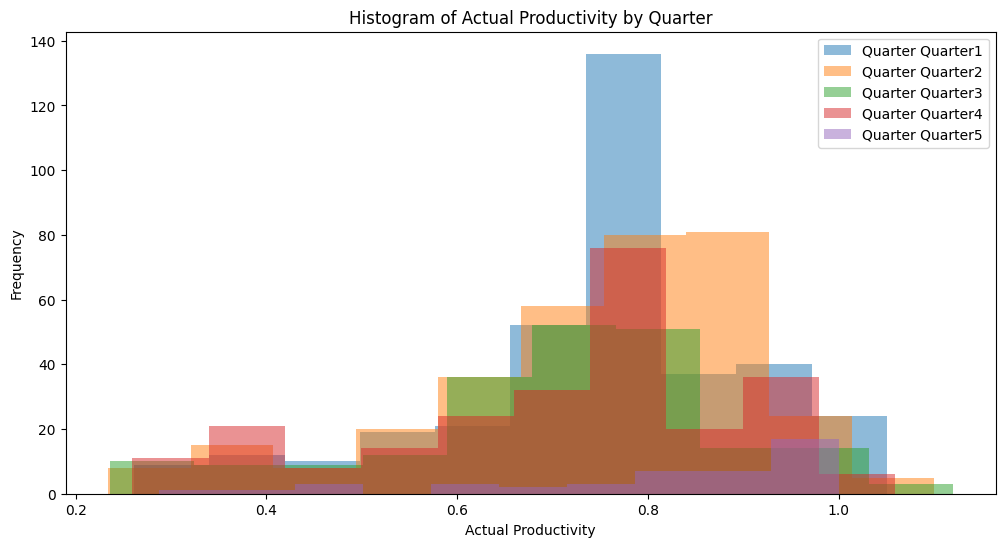

In [7]:
import matplotlib.pyplot as plt
# Calculate mean and standard deviation of actual productivity for each quarter
quarter_stats = df.groupby('quarter')['actual_productivity'].agg(['mean', 'std'])
print(quarter_stats)

# Plot histograms of actual productivity for each quarter
plt.figure(figsize=(12, 6))
for quarter in df['quarter'].unique():
  plt.hist(df[df['quarter'] == quarter]['actual_productivity'], alpha=0.5, label=f'Quarter {quarter}')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Productivity by Quarter')
plt.legend()
plt.show()

# Conclusion: (Write your conclusion based on the histogram analysis here)
# For example: It appears that Quarter 2 has the highest average actual productivity,
# while Quarter 1 has the lowest. There is also more variability in productivity in Quarter 1.


In [8]:
# Count the number of instances for each department
department_counts = df['department'].value_counts()
print(department_counts)


department
sewing       691
finishing    506
Name: count, dtype: int64


                mean       std
department                    
finishing   0.752951  0.197021
sewing      0.722013  0.154784


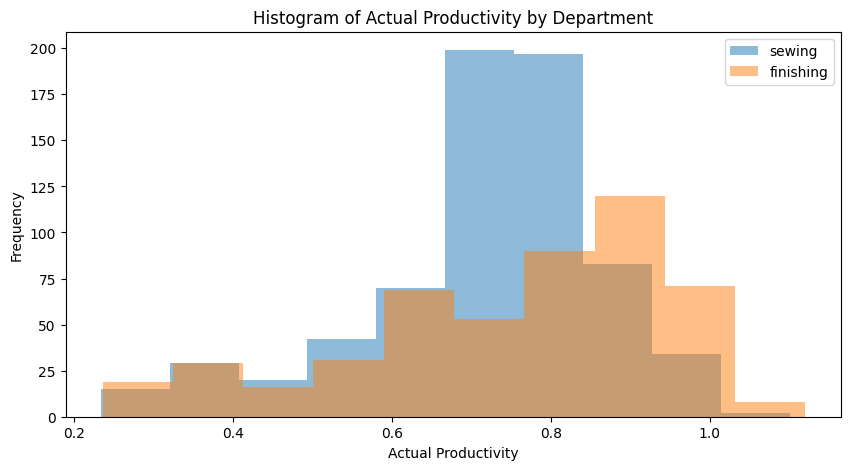

In [9]:
import matplotlib.pyplot as plt
# Calculate mean and standard deviation of actual productivity for each department
department_stats = df.groupby('department')['actual_productivity'].agg(['mean', 'std'])
print(department_stats)

# Plot histograms of actual productivity for each department
plt.figure(figsize=(10, 5))
for department in df['department'].unique():
  plt.hist(df[df['department'] == department]['actual_productivity'], alpha=0.5, label=department)
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Productivity by Department')
plt.legend()
plt.show()

# Conclusion: (Write your conclusion based on the histogram analysis here)
# For example: It seems that the finishing department has a slightly higher average actual productivity
# compared to the sewing department. The spread of productivity values also appears to be similar
# between the two departments.
